In [1]:
import pandas as pd
data=pd.read_csv("supply_chain_extended_data.csv")
data

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,4893,4.766231,6.053952,3.840976,28701,16975,2778,228,26,83
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,4453,4.304335,3.886996,2.113929,36198,14052,1535,288,16,39
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,5956,1.030779,7.335160,4.211437,22784,9863,13435,153,3,49
3,WH428,Atlanta,2219,777,7,6,15,38940,S431,Apparel,5814,2.871244,1.393481,1.751671,13172,15911,14508,143,39,35
4,WH202,Dallas,809,4756,2,7,16,33933,S821,Electronics,2279,4.060930,4.212666,4.231919,39619,19011,1904,296,30,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,WH145,New York,4357,1521,10,5,20,65281,S830,Groceries,5909,3.938249,5.445214,1.829305,47701,1581,5792,119,43,97
496,WH181,Miami,3110,3322,4,7,8,88426,S663,Groceries,4584,3.786971,1.452853,4.916439,48667,4070,9536,47,29,77
497,WH068,Seattle,1636,4170,4,3,6,87751,S961,Apparel,1699,0.683904,8.474156,4.142398,17858,9501,5919,9,38,61
498,WH204,Seattle,1821,536,9,6,23,78229,S966,Electronics,8828,1.298125,7.006858,1.150413,12831,7219,3575,204,24,48


In [2]:
data.isnull().sum()

Warehouse_ID             0
Location                 0
Current_Stock            0
Demand_Forecast          0
Lead_Time_Days           0
Shipping_Time_Days       0
Stockout_Risk            0
Operational_Cost         0
Supplier_ID              0
Product_Category         0
Monthly_Sales            0
Order_Processing_Time    0
Return_Rate              0
Customer_Rating          0
Warehouse_Capacity       0
Storage_Cost             0
Transportation_Cost      0
Backorder_Quantity       0
Damaged_Goods            0
Employee_Count           0
dtype: int64

In [3]:
print(data.duplicated().sum())  # Count of duplicate rows


0


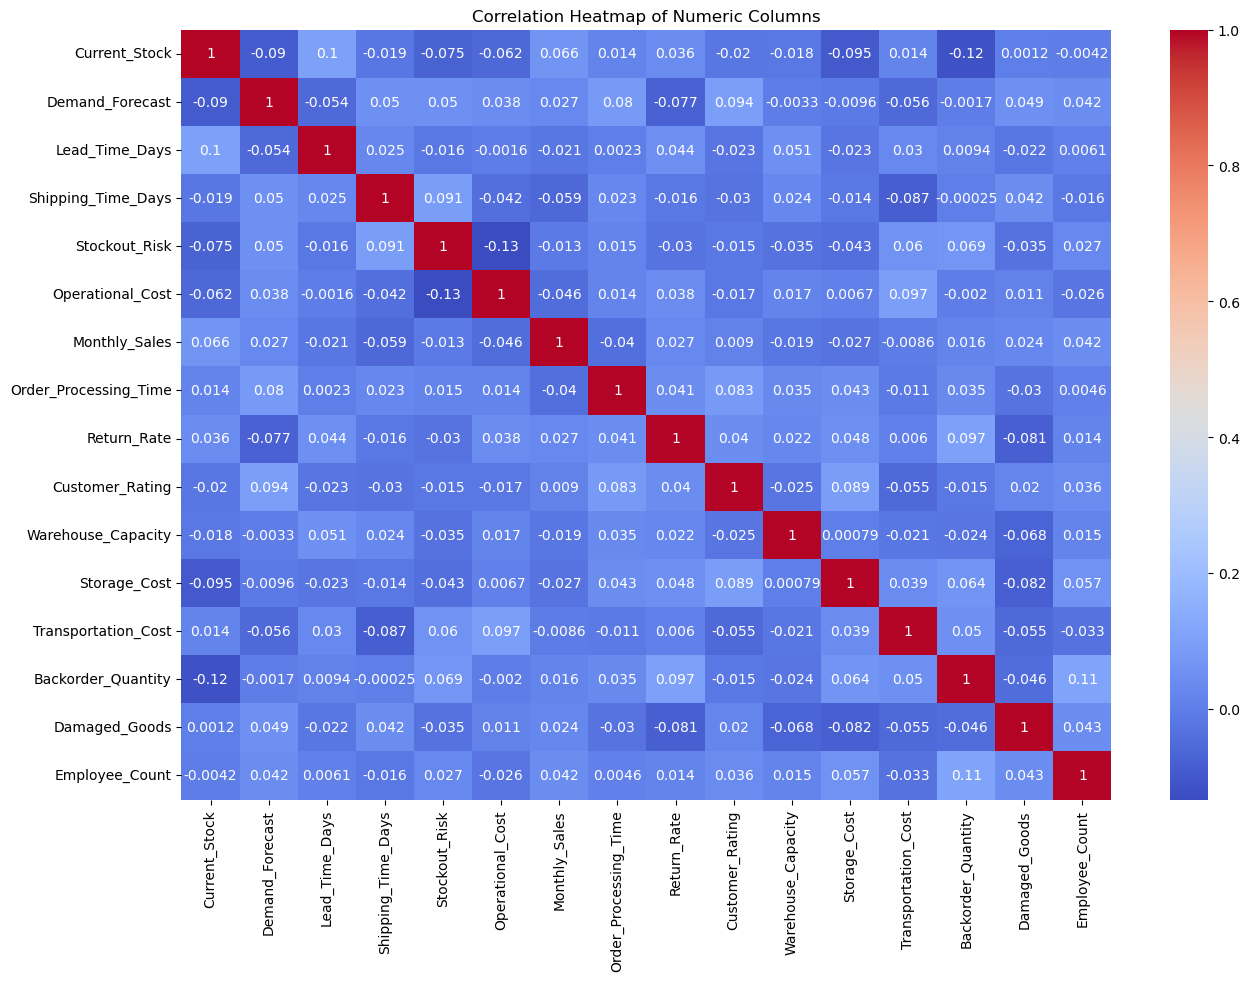

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_col=["Current_Stock", "Demand_Forecast","Lead_Time_Days" ,"Shipping_Time_Days","Stockout_Risk","Operational_Cost","Monthly_Sales","Order_Processing_Time",  
  "Return_Rate","Customer_Rating","Warehouse_Capacity","Storage_Cost","Transportation_Cost","Backorder_Quantity","Damaged_Goods","Employee_Count"]
numeric_df= data[num_col]
plt.figure(figsize=(15, 10)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


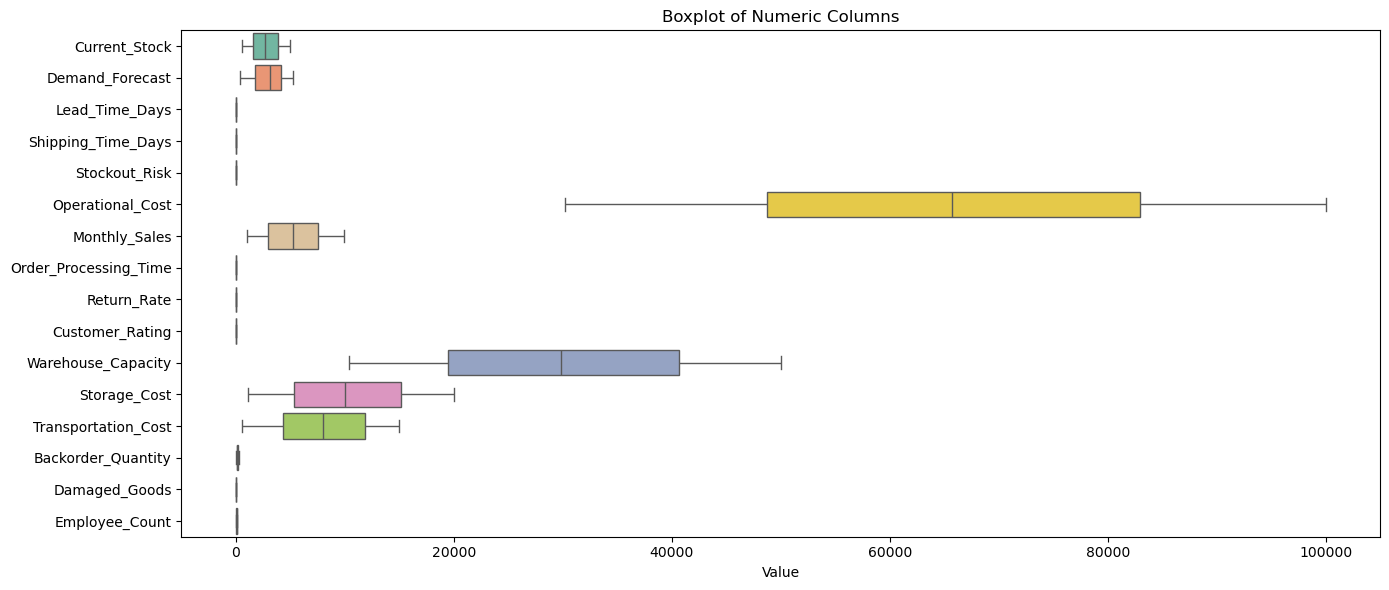

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title("Boxplot of Numeric Columns")
plt.xlabel("Value")
plt.tight_layout()
plt.show()


C:\Users\Jains\AppData\Local\Temp\ipykernel_2368\2480857228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Warehouse_ID", y="Shipping_Time_Days", data=delay_analysis.head(10), palette="Reds_r")


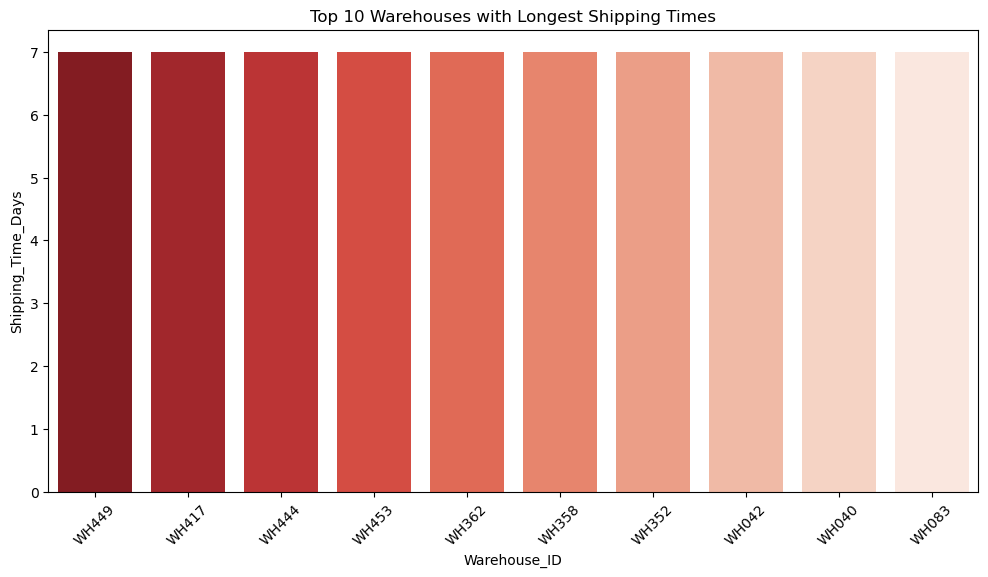

In [6]:
# Identify warehouses with highest average shipping delays
delay_analysis = data.groupby("Warehouse_ID")["Shipping_Time_Days"].mean().reset_index()
delay_analysis = delay_analysis.sort_values(by="Shipping_Time_Days", ascending=False)
delay_analysis

# Visualize shipping delays
plt.figure(figsize=(12, 6))
sns.barplot(x="Warehouse_ID", y="Shipping_Time_Days", data=delay_analysis.head(10), palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Warehouses with Longest Shipping Times")
plt.show()

C:\Users\Jains\AppData\Local\Temp\ipykernel_2368\415035302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Tran_cost, x='Warehouse_ID', y='Transportation_Cost', palette='Blues')


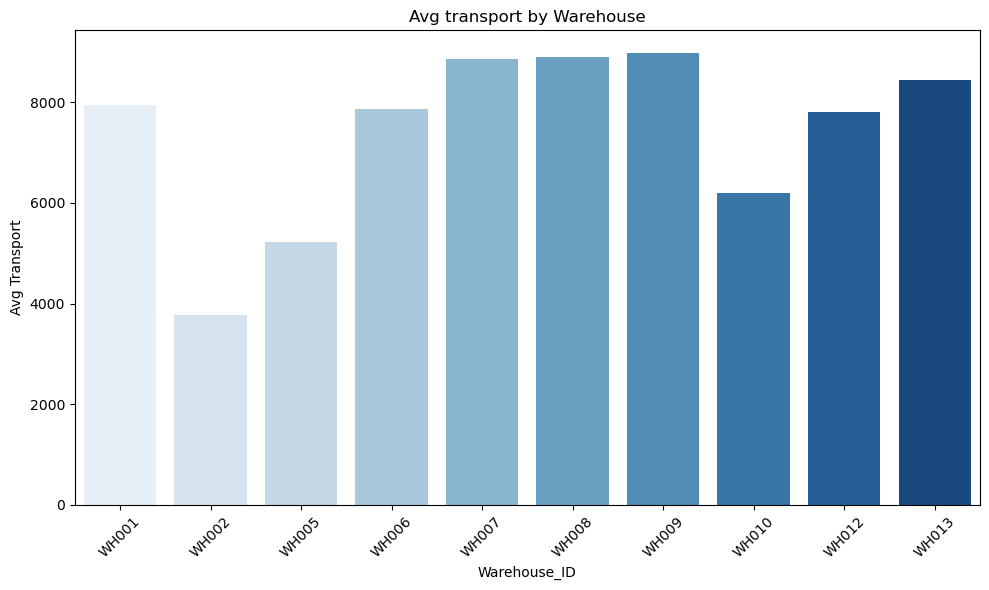

In [43]:
Tran_cost = data.groupby('Warehouse_ID')['Transportation_Cost'].mean().reset_index().head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=Tran_cost, x='Warehouse_ID', y='Transportation_Cost', palette='Blues')
plt.title('Avg transport by Warehouse')
plt.ylabel('Avg Transport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

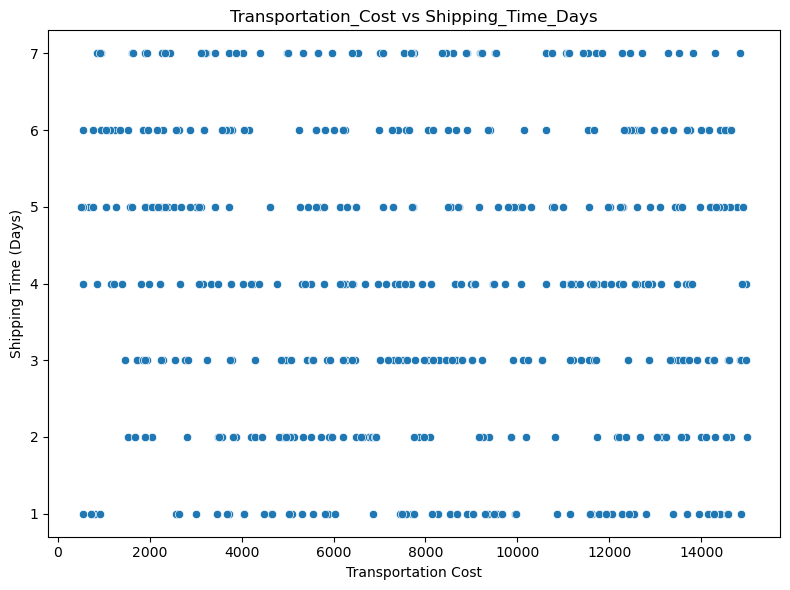

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Transportation_Cost', y='Shipping_Time_Days')
plt.xlabel('Transportation Cost')
plt.title('Transportation_Cost vs Shipping_Time_Days')
plt.ylabel('Shipping Time (Days)')
plt.tight_layout()
plt.show()

In [7]:
# Calculate stock-demand ratio
data["Stock_Demand_Ratio"] = data["Current_Stock"] / data["Demand_Forecast"]

# Classify warehouses as understocked, balanced, or overstocked
data["Stock_Status"] = data["Stock_Demand_Ratio"].apply(lambda x: "Understocked" if x < 0.8 else "Overstocked" if x > 1.2 else "Balanced")

# Count warehouse stock status
stock_summary = data["Stock_Status"].value_counts()
stock_summary




Stock_Status
Understocked    203
Overstocked     178
Balanced        119
Name: count, dtype: int64

C:\Users\Jains\AppData\Local\Temp\ipykernel_2368\1769680099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_summary.index, y=stock_summary.values, palette="coolwarm")


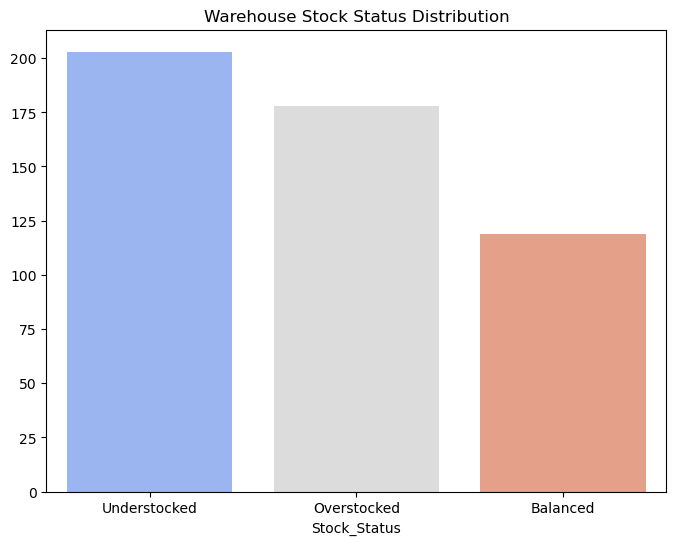

In [8]:
# Visualize stock balance
plt.figure(figsize=(8, 6))
sns.barplot(x=stock_summary.index, y=stock_summary.values, palette="coolwarm")
plt.title("Warehouse Stock Status Distribution")
plt.show()

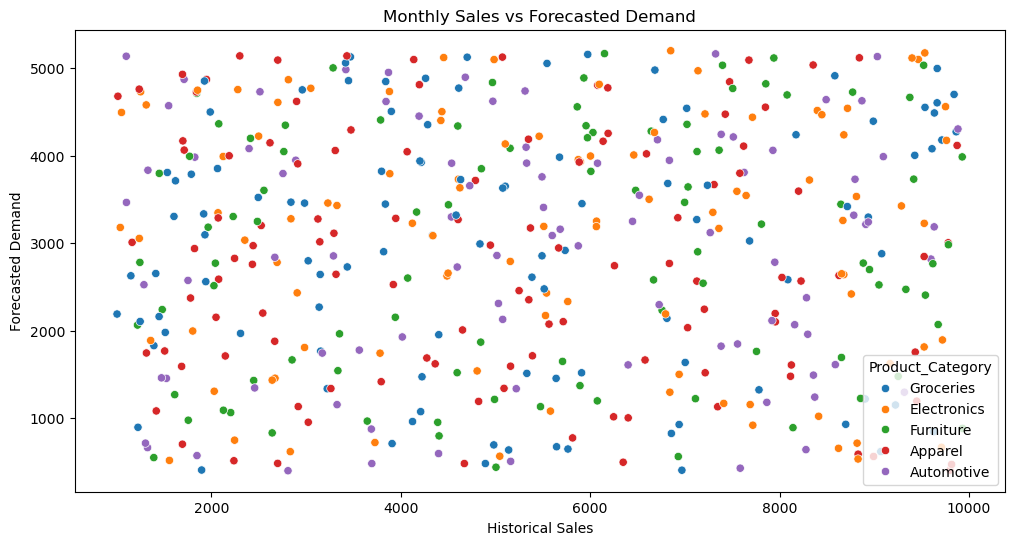

Correlation between past sales and forecast: 0.03


In [9]:
# Compare Monthly Sales (historical) vs Forecast
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Monthly_Sales', y='Demand_Forecast', hue='Product_Category')
plt.title('Monthly Sales vs Forecasted Demand')
plt.xlabel('Historical Sales')
plt.ylabel('Forecasted Demand')
plt.show()

# Calculate correlation
correlation = data['Monthly_Sales'].corr(data['Demand_Forecast'])
print(f"Correlation between past sales and forecast: {correlation:.2f}")


In [10]:
import pandas as pd



# Calculate total cost
data['Total_Cost'] = data['Operational_Cost'] + data['Storage_Cost'] + data['Transportation_Cost']


# Calculate profit
data['Profit'] = data['Monthly_Sales'] - data['Total_Cost']

# Calculate profit margin
data['Profit_Margin'] = data['Profit'] / data['Monthly_Sales']


# Group by Location and Product Category
location_profit = data.groupby('Location')[['Profit', 'Profit_Margin']].mean().sort_values(by='Profit', ascending=False)
product_profit = data.groupby('Product_Category')[['Profit', 'Profit_Margin']].mean().sort_values(by='Profit', ascending=False)

# Show top locations and product categories by profit margin
print("Top Locations by Profit Margin:\n", location_profit.head())
print("\nTop Product Categories by Profit Margin:\n", product_profit.head())


Top Locations by Profit Margin:
                 Profit  Profit_Margin
Location                             
Chicago  -74004.863636     -16.954450
Dallas   -74708.607843     -20.642778
Atlanta  -76869.927273     -18.062285
New York -78265.370370     -22.718894
Houston  -78413.704545     -20.897312

Top Product Categories by Profit Margin:
                         Profit  Profit_Margin
Product_Category                             
Groceries        -77314.266667     -22.818003
Furniture        -77616.301075     -20.054763
Electronics      -77798.950000     -20.486461
Automotive       -78739.707865     -20.570597
Apparel          -82157.592920     -23.771026


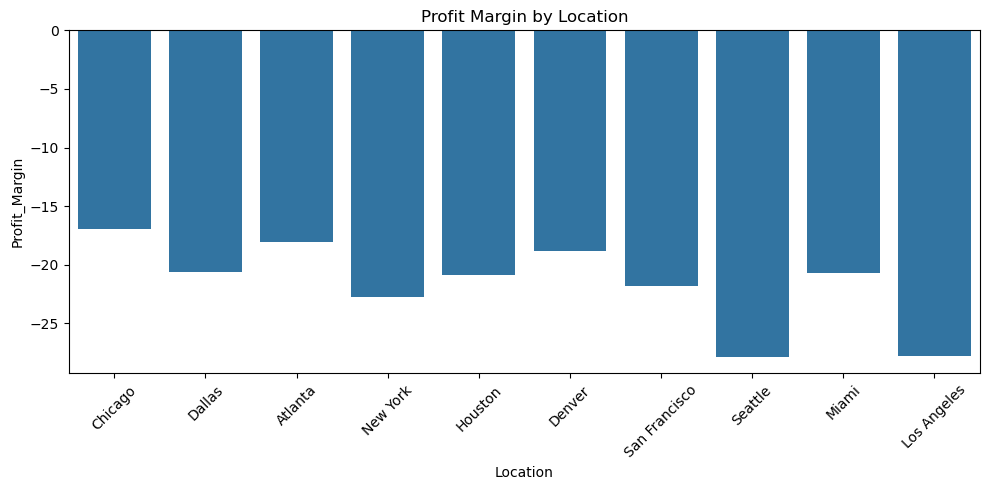

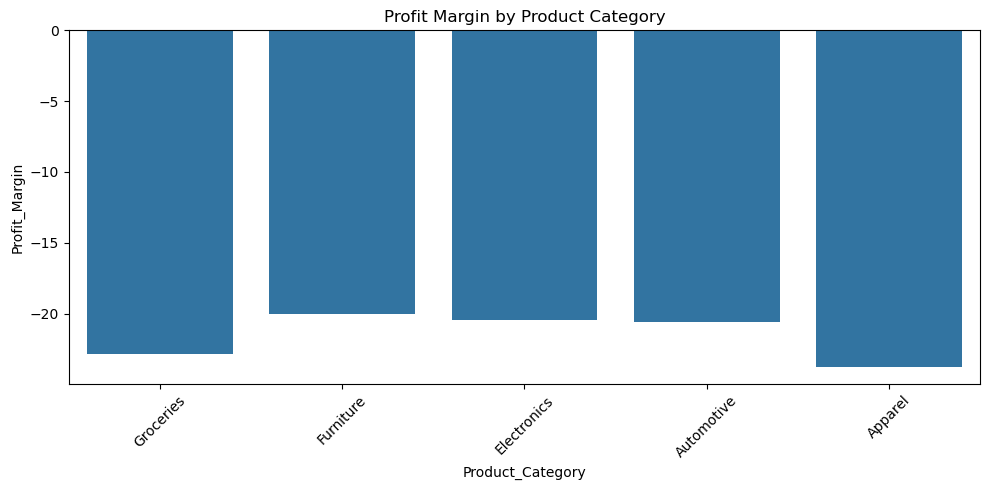

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for locations
plt.figure(figsize=(10,5))
sns.barplot(x=location_profit.index, y=location_profit['Profit_Margin'])
plt.title('Profit Margin by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Barplot for product categories
plt.figure(figsize=(10,5))
sns.barplot(x=product_profit.index, y=product_profit['Profit_Margin'])
plt.title('Profit Margin by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total Current Stock by Product Category:

Product_Category
Apparel        301653
Groceries      296597
Electronics    275000
Furniture      253736
Automotive     234425
Name: Current_Stock, dtype: int64

Total Current Stock Across All Product Categories: 1361411


C:\Users\Jains\AppData\Local\Temp\ipykernel_2368\2563670414.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_by_category.index, y=stock_by_category.values, palette='coolwarm')


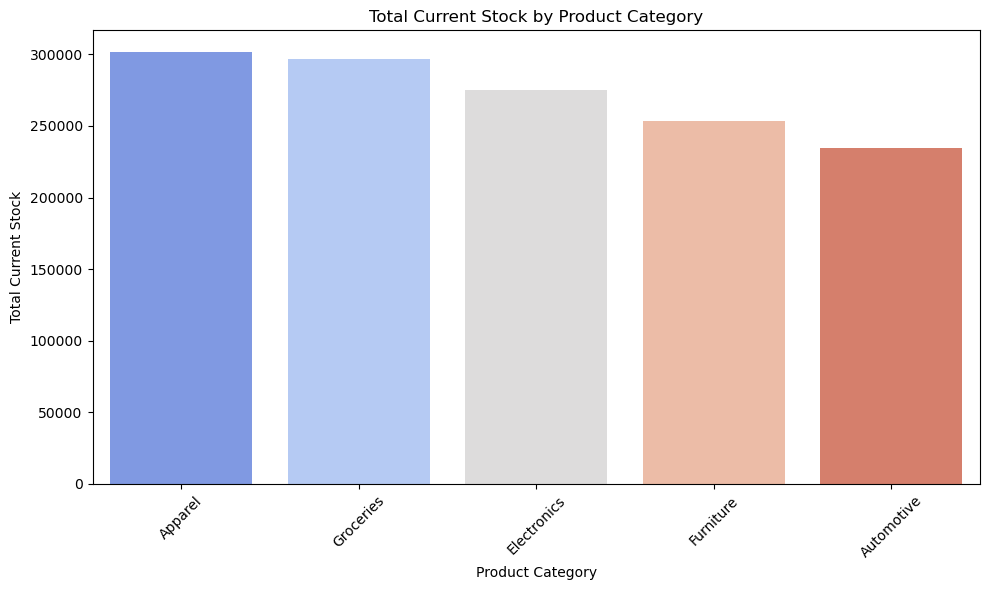

In [12]:

stock_by_category = data.groupby('Product_Category')['Current_Stock'].sum().sort_values(ascending=False)

# Display the result
print("Total Current Stock by Product Category:\n")
print(stock_by_category)

# Optional: total across all categories
total_stock = stock_by_category.sum()
print(f"\nTotal Current Stock Across All Product Categories: {total_stock}")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=stock_by_category.index, y=stock_by_category.values, palette='coolwarm')
plt.title('Total Current Stock by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Current Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



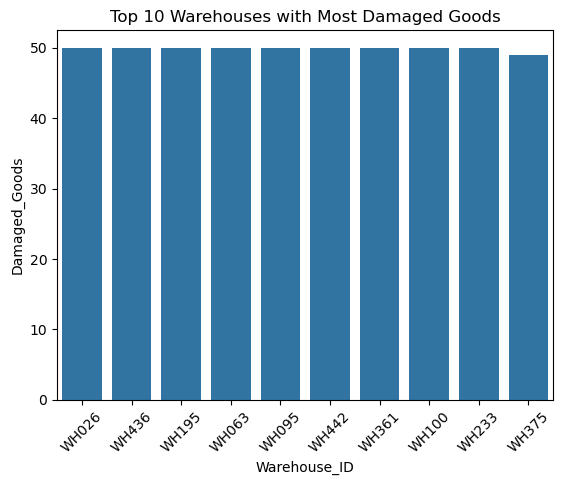

In [21]:
top_damaged=data.sort_values('Damaged_Goods',ascending=False).head(10)
sns.barplot(data=top_damaged,x='Warehouse_ID',y='Damaged_Goods')
plt.title('Top 10 Warehouses with Most Damaged Goods')
plt.xticks(rotation=45)
plt.show()

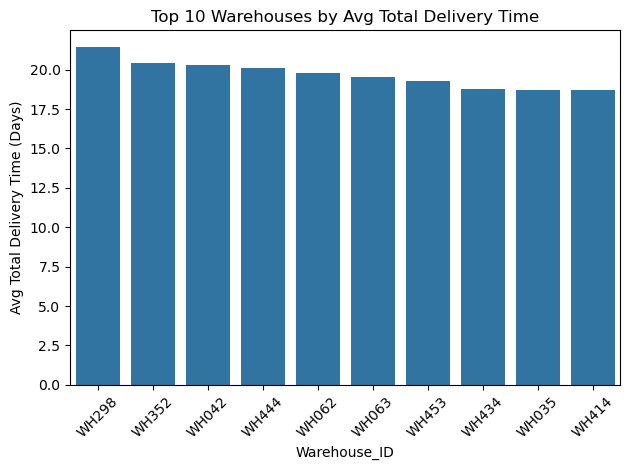

In [31]:
data['Total_Delivery_Time'] = data['Lead_Time_Days'] + data['Shipping_Time_Days'] + data['Order_Processing_Time']
warehouse_avg=data.groupby('Warehouse_ID')['Total_Delivery_Time'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=warehouse_avg,x='Warehouse_ID',y='Total_Delivery_Time')
plt.title('Top 10 Warehouses by Avg Total Delivery Time')
plt.ylabel('Avg Total Delivery Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

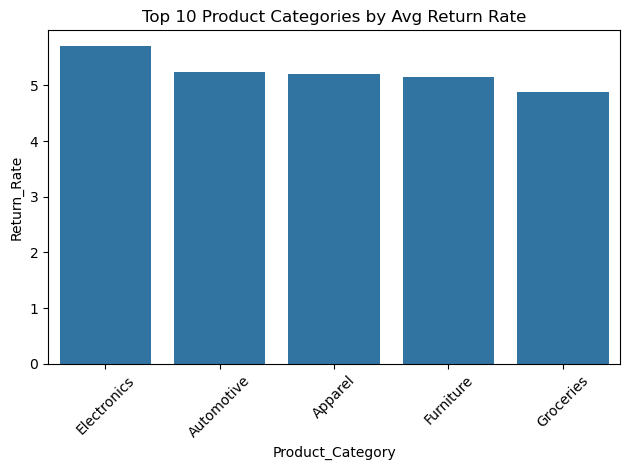

In [34]:
return_avg=data.groupby('Product_Category')['Return_Rate'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=return_avg,x='Product_Category',y='Return_Rate')
plt.title('Top 10 Product Categories by Avg Return Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
